In [863]:
#  import of useful modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import ParameterGrid
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [454]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 19600)

In [455]:
path= "C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/Flipkart"
files = os.listdir(path)
files


['flipkart_com-ecommerce_sample_1050.csv', 'Images']

In [456]:
Dict = {}
#  the dictionnary can contain all the csv files needed
for file in files:
    if file[-4:] == '.csv':
        Dict[file[:-4]] = pd.read_csv(os.path.join(os.path.abspath(path), file))
        # pd.read_scv must receive a path not only a name of a file !!

In [457]:
for name, data in Dict.items():
    # thanks to Ana I progressed
    # Displays name and head of each DataFrame
    print(name, "\n")
    display(data.head(10))
    print(f"Nombre d'individus: {data.shape[0]}, Nombre de features:{data.shape[1]}")

flipkart_com-ecommerce_sample_1050 



,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04 07:25:36 +0000,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
7,dd0e3470a7e6ed76fd69c2da27721041,2015-12-04 07:25:36 +0000,http://www.flipkart.com/t-star-uft-tsw-005-bk-...,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",WATECFFVGFZPAD3D,999.0,399.0,dd0e3470a7e6ed76fd69c2da27721041.jpg,False,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
8,41384da51732c0b4df3de8f395714fbb,2015-12-04 07:25:36 +0000,http://www.flipkart.com/alfajr-wy16b-youth-dig...,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[""Watches >> Wrist Watches >> Alfajr Wrist Wat...",WATECHFU4QGFQEJG,5495.0,4995.0,41384da51732c0b4df3de8f395714fbb.jpg,False,"Alfajr WY16B Youth Digital Watc

Nombre d'individus: 1050, Nombre de features:15


In [458]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

EDA = Explorating Data Analysis

In [459]:
data = Dict["flipkart_com-ecommerce_sample_1050"]

In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [461]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

# identify the main categories we plan to use as labels to plot T-SNE or PCA. 

In [462]:
listes = data.product_category_tree.unique().tolist()
categories  =[]
for tree in range(len(listes)):
    categories.append(listes[tree][:(listes[tree].find(">>"))])
set(categories)

{'["Baby Care ',
 '["Beauty and Personal Care ',
 '["Computers ',
 '["Home Decor & Festive Needs ',
 '["Home Furnishing ',
 '["Kitchen & Dining ',
 '["Watches '}

In [463]:
# Create a dictionnary for those categories
MycategoriesSet =  [(0 , '["Baby Care') ,
                (1, '["Beauty and Personal Care') ,
                (2,'["Computers'),
                (3,'["Home Decor & Festive Needs'),
                (4,'["Home Furnishing'),
                (5,'["Kitchen & Dining'), (6, '["Watches')]

In [464]:
len(MycategoriesSet)

7

In [465]:
MycategoriesSet[5][0]

5

In [466]:
MycategoriesSet[6]

(6, '["Watches')

In [467]:
for row in data.iterrows():
    if 'Baby Care' in data.product_category_tree.to_list():
        print('Yes')

In [468]:
for i in range(len(ll)):
    for j in range(7):
        if ll[i].startswith(MycategoriesSet[j][1]):
            data.loc[i,"labels"] = MycategoriesSet[j][0]


In [469]:
for i in range(len(MycategoriesSet)):
    print(MycategoriesSet[i][1])

["Baby Care
["Beauty and Personal Care
["Computers
["Home Decor & Festive Needs
["Home Furnishing
["Kitchen & Dining
["Watches


In [470]:
for i in range(7):
    if MycategoriesSet[i][1] in data.loc[:,"product_category_tree"]:
        data['labels'] = MycategoriesSet[i][0]

In [471]:
data['labels'].value_counts()

4.0    150
0.0    150
6.0    150
3.0    150
5.0    150
1.0    150
2.0    150
Name: labels, dtype: int64

In [472]:
listes[3]

'["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]'

In [473]:
data.describe(include='object')

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,889,889,11,22


In [474]:
data.description.apply(lambda n:len(n)).sort_values()
#  this is to calculate the nombers of words in each single item description.

877      109
890      109
1030     111
651      112
892      112
        ... 
589     2436
916     2529
715     2594
639     3447
437     3490
Name: description, Length: 1050, dtype: int64

In [475]:
data.head(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,labels
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",4.0
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",0.0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",0.0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",4.0
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",4.0
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",6.0
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04 07:25:36 +0000,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",6.0
7,dd0e3470a7e6ed76fd69c2da27721041,2015-12-04 07:25:36 +0000,http://www.flipkart.com/t-star-uft-tsw-005-bk-...,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",WATECFFVGFZPAD3D,999.0,399.0,dd0e3470a7e6ed76fd69c2da27721041.jpg,False,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",6.0
8,41384da51732c0b4df3de8f395714fbb,2015-12-04 07:25:36 +0000,http://www.flipkart.com/alfajr-wy16b-youth-dig...,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[""Watches >> Wrist Watches >> Alfajr Wrist Wat...",WATECHFU4QGFQEJG,5495.0,4995.0,41384da51732c0b4df3de8f395714fbb.jpg

In [476]:
Cols = ['product_name', 'description', 'labels']
data = data[Cols]
data

,product_name,description,labels
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,4.0
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,0.0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,0.0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,4.0
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,4.0
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,0.0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,0.0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,0.0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,0.0


TOKENIZATION

In [477]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [589]:
doc= data.sample(10)
doc

,product_name,description,labels
427,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",2.0
776,My NewBorn Solid Single Wrapper Assorted Muti ...,Buy My NewBorn Solid Single Wrapper Assorted M...,0.0
307,Aapno Rajasthan Marvel In Marble - Gold Emboss...,Buy Aapno Rajasthan Marvel In Marble - Gold Em...,3.0
948,Arabian Nights Soex Cranberry Assorted Hookah ...,Arabian Nights Soex Cranberry Assorted Hookah ...,3.0
180,Printland PMR1332 Ceramic Mug,Printland PMR1332 Ceramic Mug (350 g)\r\n ...,5.0
676,Handloomhub Polyester Baby Pink Self Design Ey...,Buy Handloomhub Polyester Baby Pink Self Desig...,4.0
262,Shoppingtara Marble Elephant Pair Showpiece -...,Buy Shoppingtara Marble Elephant Pair Showpiec...,3.0
257,Unravel India Showpiece - 16 cm,Buy Unravel India Showpiece - 16 cm for Rs.1...,3.0
553,Sonata 8974PP01 Analog Watch - For Women,Sonata 8974PP01 Analog Watch - For Women - Bu...,6.0
643,Intel 3.2 GHz LGA 1150 3250 Processor,Specifications of Intel 3.2 GHz LGA 1150 3250 ...,2.0


In [479]:
for idx, ser  in doc.iterrows():
    txt_output = f"Product : {ser['product_name']}\n"
    print(txt_output + ser['description'] + "..." + "\n\n")

Product : Engage Tease and Tease Combo Set
Flipkart.com: Buy Engage Tease and Tease Combo Set online only for Rs. 350 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


Product : Mandhania Cotton Bath Towel
Buy Mandhania Cotton Bath Towel at Rs. 280 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!...


Product : Cotonex Black, White Cotton Kitchen Linen Set
Cotonex Black, White Cotton Kitchen Linen Set (Pack of 2) Price: Rs. 299 Reviews of Cotonex 100% Pure Cotton Glove,Specifications of Cotonex Black, White Cotton Kitchen Linen Set (Pack of 2) General Brand Cotonex Design Code KLS215 Material Cotton Style Code 56213KLS215 Pattern Checkered Design Check Design Color Black, White Dimensions Weight 150 g Additional Features Fabric Care Machine washable, do not dry clean, do not bleach In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Glove...


Product : Sonata 7085YL01 Analog Watch 

In [480]:
Mydata_description = data['description'].sample(3).to_numpy()
Mydata_description =  Mydata_description[2].lower()
Mydata_description

"buy carter's self design single blanket multicolor at rs. 980 at flipkart.com. only genuine products. free shipping. cash on delivery!"

In [481]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer

First tokenizer = word_tokenize

In [482]:
def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])

In [483]:
tokens = word_tokenize (Mydata_description)
len(tokens)
tokens

['buy',
 'carter',
 "'s",
 'self',
 'design',
 'single',
 'blanket',
 'multicolor',
 'at',
 'rs',
 '.',
 '980',
 'at',
 'flipkart.com',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 'free',
 'shipping',
 '.',
 'cash',
 'on',
 'delivery',
 '!']

In [484]:
display_tokens_info(tokens)

Nb of tokens : 26, nb of single tokens : 22
['buy', 'carter', "'s", 'self', 'design', 'single', 'blanket', 'multicolor', 'at', 'rs', '.', '980', 'at', 'flipkart.com', '.', 'only', 'genuine', 'products', '.', 'free', 'shipping', '.', 'cash', 'on', 'delivery', '!']


In [485]:
tokens = wordpunct_tokenize (Mydata_description)
display_tokens_info(tokens)

Nb of tokens : 29, nb of single tokens : 24
['buy', 'carter', "'", 's', 'self', 'design', 'single', 'blanket', 'multicolor', 'at', 'rs', '.', '980', 'at', 'flipkart', '.', 'com', '.', 'only', 'genuine', 'products', '.', 'free', 'shipping', '.', 'cash', 'on', 'delivery', '!']


Stopwords

In [486]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [487]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

Nb of tokens : 24, nb of single tokens : 20
['buy', 'carter', "'", 'self', 'design', 'single', 'blanket', 'multicolor', 'rs', '.', '980', 'flipkart', '.', 'com', '.', 'genuine', 'products', '.', 'free', 'shipping', '.', 'cash', 'delivery', '!']


Second Tokenizer = RegexpTokenizer

In [488]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(Mydata_description)
display_tokens_info(tokens) 

Nb of tokens : 22, nb of single tokens : 21
['buy', 'carter', 's', 'self', 'design', 'single', 'blanket', 'multicolor', 'at', 'rs', '980', 'at', 'flipkart', 'com', 'only', 'genuine', 'products', 'free', 'shipping', 'cash', 'on', 'delivery']


In [489]:
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

Nb of tokens : 17, nb of single tokens : 17
['buy', 'carter', 'self', 'design', 'single', 'blanket', 'multicolor', 'rs', '980', 'flipkart', 'com', 'genuine', 'products', 'free', 'shipping', 'cash', 'delivery']


In [490]:
Sentence = "Demain, dès l'aube, je+partirai, vois-tu je ne puis demeurer loin de toi plus longtemps."
Sentence2 = " Pourquoi un chien très moche, un cheval lourdement fourbu, un rat*auraient-ils la vie, Et toi si belle, chatoiement sage, plus un souffle ? Tu ne reviendras plus, Jamais, jamais, jamais, jamais, jamais ! "

## Essais

In [491]:
Xanadu = "In Xanadu did Kubla Khan A stately pleasure-dome decree:Where Alph, the sacred river, ran Through caverns measureless to man Down to a sunless sea. So twice five miles of fertile groundWith walls and towers were girdled round; And there were gardens bright with sinuous rills, where blossomed many an incense-bearing tree; And here were forests ancient as the hills, Enfolding sunny spots of greenery."

In [492]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [493]:
tokenizer = RegexpTokenizer(r"\w+")
# Sentence.replace('-', ' ')
tokens = tokenizer.tokenize(Sentence2)
Sentence2.lower()

' pourquoi un chien très moche, un cheval lourdement fourbu, un rat*auraient-ils la vie, et toi si belle, chatoiement sage, plus un souffle ? tu ne reviendras plus, jamais, jamais, jamais, jamais, jamais ! '

In [494]:
def stop_word_filter_fct(list_words) :
    adverbs = []
    filtered_w = [w for w in list_words if not w in stop_words]
    # filtered_w2 = [w for w in filtered_w if len(w) > 2]
    filtered_w3 = nltk.pos_tag(filtered_w)
    for t in range(len(filtered_w3)):
        if filtered_w3[t][1] == 'RB':
            adverbs.append(filtered_w3[t][0])
        filtered_w = [w for w in filtered_w if not w in adverbs ]

    return filtered_w

In [495]:
tokens = tokenizer.tokenize(Xanadu)
len(tokens)

67

In [496]:
XANADUfiltered = stop_word_filter_fct(tokens)
len(XANADUfiltered)
# XANADUfiltered

45

 ## A function to prepare a document to be processed in a bag of words

In [497]:
tokenizer = RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])

def stop_word_filter_fct(list_words) :
    adverbs = []
    filtered_w = [w for w in list_words if not w in stop_words]
    # filtered_w2 = [w for w in filtered_w if len(w) > 2]
    filtered_w3 = nltk.pos_tag(filtered_w)
    for t in range(len(filtered_w3)):
        if filtered_w3[t][1] == 'RB':
            adverbs.append(filtered_w3[t][0])
        filtered_w = [w for w in filtered_w if not w in adverbs ]

    return filtered_w

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

  
    
def transform_for_bagging (tokenizer,
                            document,
                            rejoin=False) :

    document = document.lower().strip()
    # Strip to remove space at the beginning and at the end of the document
        
    tokens = tokenizer.tokenize(document)
    display_tokens_info(tokens)

    tokens_filtered = stop_word_filter_fct(tokens)
    display_tokens_info(tokens)

    tokens_filtered_lemmatised  = lemma_fct(tokens_filtered)

    if rejoin:
        return " ".join(tokens_filtered_lemmatised)
    return tokens_filtered_lemmatised

In [531]:
data_filtered = pd.DataFrame()
data_filtered['description'] = data["description"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))
data_filtered['product_name'] = data["product_name"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))

Nb of tokens : 236, nb of single tokens : 132
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this']
Nb of tokens : 236, nb of single tokens : 132
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this']
Nb of tokens : 74, nb of single tokens : 48
['specifications', 'of', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'features', 'machine', 'washable', 'yes', 'material', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiyas', 'type', 'bath', 'towel', 'gsm']
Nb of toke

In [787]:
data_filtered

,description,product_name,Name_and_Description
0,key feature elegance polyester multicolor abst...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...
1,specification sathiyas cotton bath towel 3 bat...,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...
2,key feature eurospa cotton terry face towel se...,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...
3,key feature santosh royal fashion cotton print...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...
4,key feature jaipur print cotton floral king si...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...
...,...,...,...
1045,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...
1046,wallmantra large vinyl sticker sticker pack 1 ...,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack 1 ...
1047,buy uberlyfe extra large pigmented polyvinyl f...,uberlyfe extra large pigmented polyvinyl film ...,buy uberlyfe extra large pigmented polyvinyl f...
1048,buy wallmantra medium vinyl sticker sticker r ...,wallmantra medium vinyl sticker sticker,buy wallmantra medium vinyl sticker sticker r ...


In [608]:
# Aggregate all the descriptions together
corpus = data_filtered['Name_and_Description'].str.cat(sep=' ')

# Get the list of words
list_words = corpus.split()
print("Number of words: {}".format(len(list_words)))
print("Number of unique words: {}".format(len(set(list_words))))

Number of words: 65904
Number of unique words: 6093


In [726]:
X_dense_Projected  = PCA_reduction (df_X_dense , 0.95 )

In [841]:
data_filtered['Name_and_Description'] = data_filtered["description"] + data_filtered["product_name"]
data_filtered


,description,product_name,Name_and_Description
0,key feature elegance polyester multicolor abst...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...
1,specification sathiyas cotton bath towel 3 bat...,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...
2,key feature eurospa cotton terry face towel se...,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...
3,key feature santosh royal fashion cotton print...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...
4,key feature jaipur print cotton floral king si...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...
...,...,...,...
1045,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...
1046,wallmantra large vinyl sticker sticker pack 1 ...,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack 1 ...
1047,buy uberlyfe extra large pigmented polyvinyl f...,uberlyfe extra large pigmented polyvinyl film ...,buy uberlyfe extra large pigmented polyvinyl f...
1048,buy wallmantra medium vinyl sticker sticker r ...,wallmantra medium vinyl sticker sticker,buy wallmantra medium vinyl sticker sticker r ...


In [858]:
My_data_description = data_filtered['description']
My_data_product_name = data_filtered['product_name']
My_data_Name_and_Description = data_filtered['Name_and_Description']



pandas.core.series.Series

In [843]:
array_description = My_data_description.to_numpy().tolist()
array_product_name = My_data_product_name.to_numpy().tolist()
array_Name_and_Description = My_data_Name_and_Description.to_numpy().tolist()

In [859]:
Data_liste = [My_data_description, My_data_product_name, My_data_Name_and_Description]

In [875]:
type(My_data_description)

pandas.core.series.Series

## Bags of words

In [844]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

#  Tf-idf vectorizer
corpus = data_filtered['Name_and_Description']
tfidf_vectorizer.fit(data_filtered['product_name'])
X = tfidf_vectorizer.transform(data_filtered['Name_and_Description'])
Colonne = tfidf_vectorizer.get_feature_names_out ()

# Conversion to a dense array for later use
X_dense = X.todense()

print('Size of the vocabulary: {}'.format(len(list(tfidf_vectorizer.vocabulary_))))
print('Number of stop words: {}'.format(len(tfidf_vectorizer.stop_words_)))

Size of the vocabulary: 715
Number of stop words: 1484


In [845]:
df_X_dense

,005,01,06,10,1000,101,107,11,1100,12,122,13,14,15,16,17,18,19,196,1tb,20,200gm,21,22,23,24,25,27,28,2gb,30,300,310,33,36,3d,40,400,43,45,48,4gb,50,59,5th,5v,60,62,75,750,78,800,84,85,89,90,9a,aapno,abstract,ac750,adapter,adhesive,adidas,adsl,aero,air,akup,alfajr,allin,almond,aloevera,analog,andre,android,angel,animal,anodised,anti,antique,antiqueshop,apple,ar,arabian,arb,archies,aroma,art,artificial,artpiece,assorted,asus,attivo,avenue,baby,babyoye,background,bag,ball,balm,band,bank,base,basic,bath,battery,bazaar,bear,beautiful,bed,bedsheet,bee,beebay,beige,believe,bell,bella,berlin,bharatcraft,big,bird,birthday,bk,black,blanket,bleach,blue,bluetooth,blush,body,bodysuit,bonsai,bottle,bowl,box,boy,br,brass,brown,brush,bubble,bucket,buddha,bulb,cable,caliber,canvas,cap,card,care,carpet,cartoon,carved,case,casotec,casual,cell,ceramic,chair,charger,checkered,chinese,chokree,christmas,classic,clip,clock,club,cm,co2,coffee,collection,color,combo,comfort,comforter,compatible,computer,conditioner,connect,container,copper,core,corkscrew,cotonex,cotton,couple,cover,cow,craft,crafted,craftuno,cream,creation,creative,creme,crstl,crystal,crystle,crystle01,curtain,cushion,cute,cutter,dark,day,ddr2,decker,decor,decoration,decorative,deep,denim,deo,deodorant,design,dg,dia,diaper,digital,disney,dive,diviniti,diwan,dohar,dongli,door,doraemon,double,drawer,dress,drive,dry,dsl,dual,duvet,dv5,dv6,dynamic,edimax,edp,elegance,elephant,embroidered,enabled,engage,envy,ethnic,exotic,export,exporter,extender,extra,extract,eye,eyelet,face,facewash,facial,famous,fan,fantasy,fashion,fb,fern,fi,fiber,fit,flare,flavor,flexible,flippd,floral,floralina,fluid,fogg,food,force,frame,framed,franck,free,fruit,furnishingland,gallery,ganesh,ganesha,gateway,gathered,gb,gel,gen,geometric,gift,giftsthatwow,gigabit,girl,glass,glow,goddess,gold,golden,golmaalshop,good,grade,graphic,green,grey,gtw,guru,hair,hako,hamilton,hand,handcrafted,handicraft,handloom,handloomhub,handmade,hanging,happy,hard,hat,haveli,heart,high,hill,hmt,holder,home,honey,honour,hookah,hot,house,hp,hub,i3,ice,ideapad,idol,important,inch,independence,india,inflatable,intellect,intense,international,intex,iron,island,iw,jacadi,jaipur,jasmine,jewellery,jharoka,jrb,jug,juice,jump,jumpsuit,junction,kadhai,kalash,key,keyboard,kid,kidz,king,kit,kitchen,kliqvik,klub,kosher,krishna,kurta,la,lace,lal,lamp,lapguard,laptop,large,layered,leaf,league,led,legging,lemon,lemongrass,lenovo,letter,lid,life,light,line,linen,link,lip,lipstick,little,london,long,lord,lotion,love,luba,lucky,lunch,lx,mac,macbook,mache,magic,magnetic,magsafe,majesty,make,makeup,man,manicure,marble,maroon,marvel,massage,mat,maximum,mdf,medium,memore,men,mesleep,metal,metallino,milton,mini,mint,mixfruit,mkb,ml,mmull,mobile,modem,mom,monster,mouse,mug,multi,multicolor,multicolour,musician,n150,n300,n600,na,nail,nappy,natural,nc11,neck,nehp,neo,net,netgear,new,night,nike,nkp,north,notebook,nutcase,ocean,offspring,oil,orange,original,oxyglow,pa,pack,pad,painted,painting,pair,palito,pant,papaya,paper,paris,park,party,pavilion,pc,peacock,pen,perucci,phone,photo,piece,pink,pizza,pk,plain,plant,plastic,plated,playboy,plo,polish,polka,polo,polyester,pooja,port,portable,portia,pot,pouch,power,powered,premium,pride,print,printed,printland,prithish,pro,product,protector,pulse,purple,purpledip,purpose,pyjama,queen,quilt,radha,raga,raja,rajasthan,rajasthani,rajo,rama,range,raymond,reading,rectangular,red,rega,regular,reiki,religious,repair,replacement,rice,ro,rockmantra,rolling,romper,rose,round,router,royal,rrp,rt,ruchikainternational,runner,rythmx,sandalwood,santosh,sapatos,satin,science,se122103,sea,seater,self,series,service,set,sf,shampoo,shape,shaun,shea,sheet,shelf,shirt,shop,shopmania,shoppingtara,short,showpiece,silk,single,sipper,size,sized,skin,skmei,sleepsuit,small,smallest,smart,smartpro,smooth,soap,sofa,solid,sonata,sony,sovam,sparkling,spf,sport,spray,stainless,starting,statue,steel,step,stick,sticker,stone,strap,striped,studio,stylish,sun,

In [874]:

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

count_vectorizer = CountVectorizer( 
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1))

Result_grid = {
    'Method' : [],
    'Corpus' : [],
    'ARI score' : [],
    'fit_data' : [],
}    


def Vectorizing (vectorizer, corpus, fit_data):
    vectorizer.fit(fit_data)
    X = vectorizer.transform(corpus)
    Colonnes = vectorizer.get_feature_names_out ()
    df_X_to_plot = pd.DataFrame(data = X.todense(), columns=Colonnes)
    
    kmeans = KMeans (n_clusters= 7, random_state = 42, init='random')
    kmeans.fit(df_X_to_plot)
    labels_predicted = kmeans.labels_

    idx = data_filtered.index
    label_sample = data.loc[idx, "labels"]

    ARI = adjusted_rand_score (label_sample, labels_predicted)

    Result_grid_df = pd.DataFrame(Result_grid)

    return {"vectorized_data" : df_X_to_plot, "Ari_score" : ARI}
 

param_grid = list(ParameterGrid(
    {
    'Method' : [tfidf_vectorizer, count_vectorizer],
    'Corpus' : [My_data_description, My_data_product_name, My_data_Name_and_Description],
    'Data_fit' : [My_data_description, My_data_product_name, My_data_Name_and_Description]
    }))

for param in param_grid:
   Vector = Vectorizing(param_grid['Method'], param_grid['Corpus'], param_grid['Data_fit'])
   Result_grid['ARI score'].append(Vector['Ari_score'])
   Result_grid['Method'].append(param_grid['Method'])
   Result_grid['Corpus'].append(param_grid['Corpus'])
   Result_grid['fit_data'].append(param_grid['Data_fit'])


# Display results
Result_grid_df = pd.DataFrame(Result_grid)
print(Result_grid_df)


TypeError: list indices must be integers or slices, not str

In [ ]:
Vectorizing(param_grid['Method'], param_grid['Corpus'], param_grid['Data_fit'])

In [852]:
def plot_TSNE (dataframe):
    from sklearn.manifold import TSNE

    idx = data_filtered.index
    label_sample = data.loc[idx, "labels"]
    
    
    T_sne = TSNE(n_components=2,
            perplexity=30,
            init='pca',
            random_state=42).fit_transform(dataframe)

 # Creating figure:
    fig = plt.figure(figsize=(6, 6))
    sns.set_style("whitegrid")
  
    ax = fig.add_subplot(1,1,1)
    ax.scatter(
        T_sne[:,0],
        T_sne[:,1],
        s = 15,
        c = label_sample,
        alpha = 0.4,
        )
    ax.grid(False)
    ax.axis('off')



c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


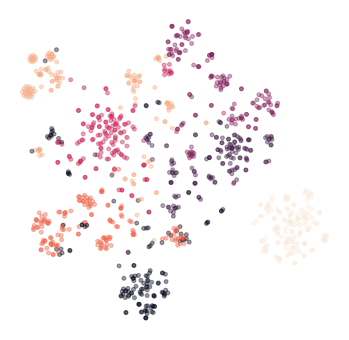

In [869]:
DF2 = Vectorizing (tfidf_vectorizer, My_data_Name_and_Description, My_data_Name_and_Description)
plot_TSNE(DF2["vectorized_data"])

In [871]:
DF2["Ari_score"]

0.2628215819921882

In [835]:
df_X_dense = pd.DataFrame(data = X_dense, columns=Colonne)

In [765]:
# création du bag of words (CountVectorizer)
vectorizer = CountVectorizer( strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1))
X = vectorizer.fit_transform(My_data_description)
Col1 = vectorizer.get_feature_names_out ()
X_product_name = vectorizer.fit_transform(My_data_product_name)
Col2 = vectorizer.get_feature_names_out ()
X_name_and_Description = vectorizer.fit_transform(My_data_Name_and_Description)
Col3 = vectorizer.get_feature_names_out () 
vectorizer.fit(My_data_product_name)
X_name_and_Description_on_Product_name = vectorizer.transform(My_data_Name_and_Description)
Col4 = vectorizer.get_feature_names_out () 

In [766]:
df_bow_cv = pd.DataFrame(data = X.toarray(), columns=Col1)
df_product_name_bow_cv = pd.DataFrame(data = X_product_name.toarray(), columns=Col2)
df_name_and_description_bow_cv = pd.DataFrame(data = X_name_and_Description.toarray(), columns=Col3)
df_name_and_Description_on_Product_name_bow_cv = pd.DataFrame(data = X_name_and_Description_on_Product_name.toarray(), columns=Col4)

In [767]:
df_bow_cv.shape

(1050, 2212)

In [768]:
df_name_and_description_bow_cv.shape

(1050, 2338)

In [770]:
df_product_name_bow_cv.shape

(1050, 715)

In [771]:
df_name_and_Description_on_Product_name_bow_cv.shape

(1050, 715)

In [814]:
idx = data_filtered.index
label_sample = data.loc[idx, "labels"]


In [695]:
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
X_TfIf=ctf.fit_transform(array)
X_TfIf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [678]:
df_bow_TfIf = pd.DataFrame(data = X_TfIf.toarray(), columns=ctf.get_feature_names_out ())

In [696]:
X_product_name_TfIf=ctf.fit_transform(array_product_name)
X_product_name_TfIf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [697]:
df_product_name_bow_TfIf = pd.DataFrame(data = X_product_name_TfIf.toarray(), columns=ctf.get_feature_names_out ())

In [511]:
import time



# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)


In [512]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## Dimensional reduction

### Through a PCA

In [735]:
def PCA_reduction (X, N_components_ratio):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=N_components_ratio)
    X_projected = pca.fit_transform(X_scaled)


    return X_projected

In [642]:
X_dense_projected = PCA_reduction(df_X_dense, 0.95)

In [593]:
X_projected = PCA_reduction (df_bow_cv, 0.95 )

In [594]:
X_projected.shape

(1050, 710)

In [595]:
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# cumsum

In [ ]:
sns.color_palette('tab10')
x_axis = X_projected[:, 0]
y_axis = X_projected[:, 1]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,  palette=['red', 'green', 'blue', 'orange'])

In [597]:
X_product_name_projected= PCA_reduction (df_product_name_bow_TfIf, 0.95 )
X_name_and_Description_projected= PCA_reduction (df_name_and_description_bow_cv, 0.95 )

In [598]:
X_pn_and_D_projected= PCA_reduction (dfpnadnD, 0.95 )

In [599]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)
T_sne = TSNE(n_components=2,
            perplexity=30,
            init='pca',
        random_state=42).fit_transform(X_projected)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 11.181787967681885 seconds


In [600]:
T_sne2 = TSNE(n_components=2,
            perplexity=30,
            init='pca',
        random_state=42).fit_transform(X_name_and_Description_projected)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 22.582398176193237 seconds


In [601]:
T_sne3 = TSNE(n_components=2,
            perplexity=30,
            init='pca',
        random_state=42).fit_transform(X_product_name_projected)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 33.55977392196655 seconds


In [ ]:
# df_bow_cv = pd.DataFrame(data = X.toarray(), columns=Col1)
# df_product_name_bow_cv = pd.DataFrame(data = X_product_name.toarray(), columns=Col2)
# df_name_and_description_bow_cv = pd.DataFrame(data = X_name_and_Description.toarray(), columns=Col3)
# df_name_and_Description_on_Product_name_bow_cv = pd.DataFrame(data = X_name_and_Description_on_Product_name.toarray(), columns=Col4)

In [752]:
X_name_and_description_projected_from_cv = PCA_reduction(df_name_and_description_bow_cv, 0.95)

In [772]:
T_sne7 = TSNE(n_components=2,
            perplexity=30,
            init='pca',
            random_state=42).fit_transform(df_name_and_description_bow_cv)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 12584.143668174744 seconds


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.2783021732347971

## graphing

In [849]:
T_sne9 = TSNE(n_components=2,
            perplexity=30,
            init='pca',
            random_state=42).fit_transform(DF1)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 15760.557308673859 seconds


(-53.572257614135744,
 44.85713920593262,
 -51.473049354553225,
 51.72505207061768)

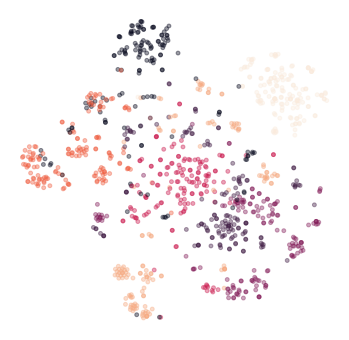

In [850]:
T_sne = TSNE(n_components=2,
            perplexity=30,
            init='pca',
            random_state=42).fit_transform()

 # Creating figure:
fig = plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
  
ax = fig.add_subplot(1,1,1)
ax.scatter(
    T_sne[:,0],
    T_sne[:,1],
    s = 15,
    c = label_sample,
    alpha = 0.4,
    )
ax.grid(False)
ax.axis('off')